In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from src.sky_segmentation import SkySegmentationDeeplab, SkySegmentationGrabCut
from src.segmentation_metrics import iou, dice
from utils import display_segmentation_results

### Let's define the configuration parameters to define SkySegmentationDeeplab

In [2]:
config_file_deeplab = r"../src/config/deeplabv3_mobilenetv3_sky_segmentation.yaml"
# Replace if needed with the /path/to/trained_model
trained_model_path = r"../results/deeplabv3_mobilenetv3_lr0.0001_maxlr_0.001_10.pth"

sky_segmentation_deeplab = SkySegmentationDeeplab(
    weights_path=trained_model_path,
    config_file=config_file_deeplab
)

### Let's define the configuration parameters to define SkySegmentationGrabCut

In [3]:
config_file_grabcut = r"../src/config/grabcut_sky_segmentation.yaml"
sky_segmentation_grabcut = SkySegmentationGrabCut(
    config_file=config_file_grabcut
)

### Get the list of images in the demo folder

In [4]:
demo_folder = r"./demo"
list_image_path= [os.path.join(demo_folder, filename)
    for filename in os.listdir(demo_folder) if os.path.splitext(filename)[-1].lower() == ".jpg"
]
list_gt_mask_path = [image_path.replace(".jpg", "_seg.png") for image_path in list_image_path]


### Let's process and display the results on these images with deeplab

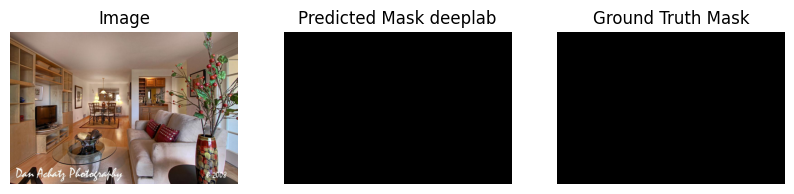

/mnt/c/sandbox/sky_segmentation/src/segmentation_metrics.py:17: RuntimeWarning: invalid value encountered in long_scalars
  iou_score = np.sum(intersection) / np.sum(union)
/mnt/c/sandbox/sky_segmentation/src/segmentation_metrics.py:32: RuntimeWarning: invalid value encountered in long_scalars
  dice_score = (2 * np.sum(intersection)) / (np.sum(pred_mask) + np.sum(true_mask))


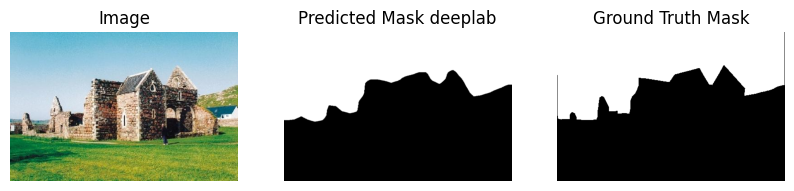

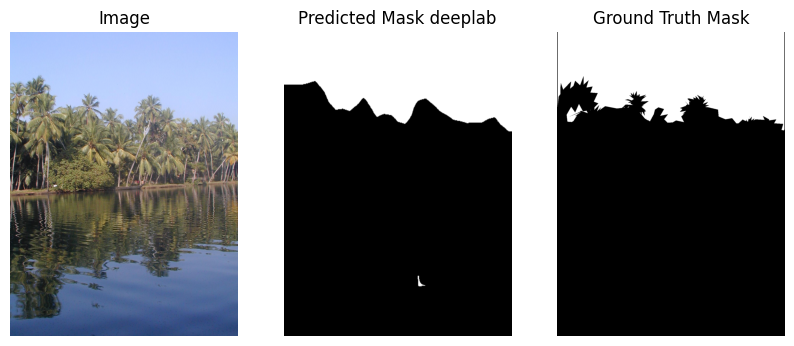

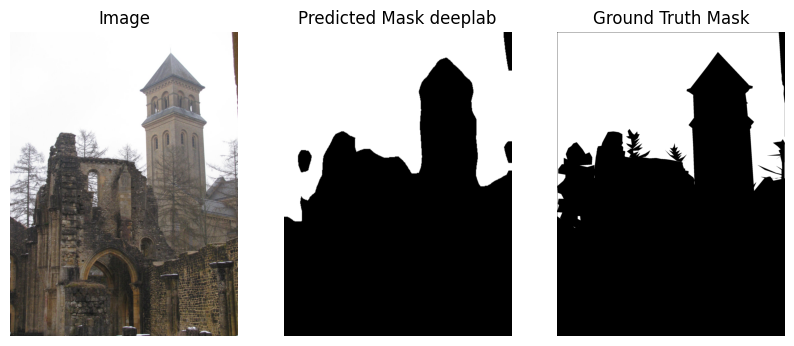

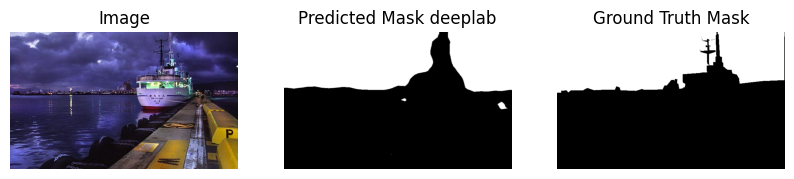

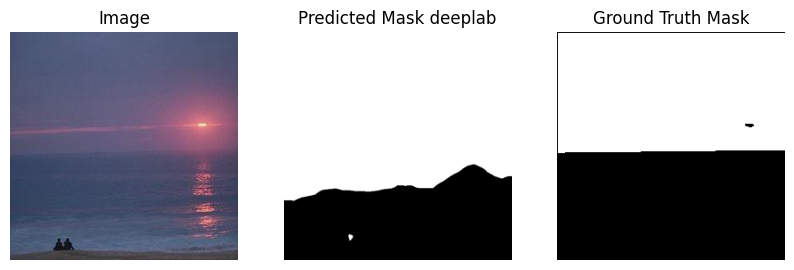

In [5]:
deeplab_iou_score = []
deeplab_dice_score = []

for idx in range(len(list_image_path)):
    # Deeplab segmentation
    image_path = list_image_path[idx]
    gt_mask_path = list_gt_mask_path[idx]
    image = Image.open(image_path)
    mask = sky_segmentation_deeplab.predict(image_path)
    gt = Image.open(gt_mask_path)
    display_segmentation_results(image, mask, gt, suffix_segm="deeplab")
    # Convert the mask to binary format
    true_pred = np.array(gt) == 255
    pred = np.array(mask) == 255
    deeplab_iou_score.append(iou(pred, true_pred))
    deeplab_dice_score.append(dice(pred, true_pred))

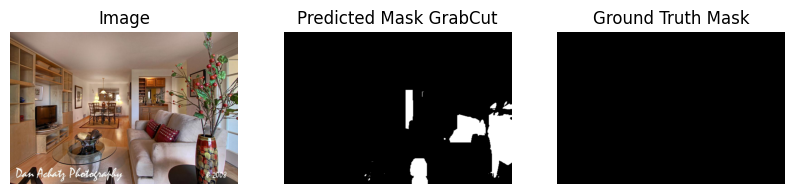

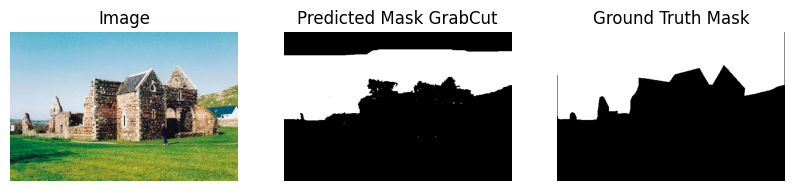

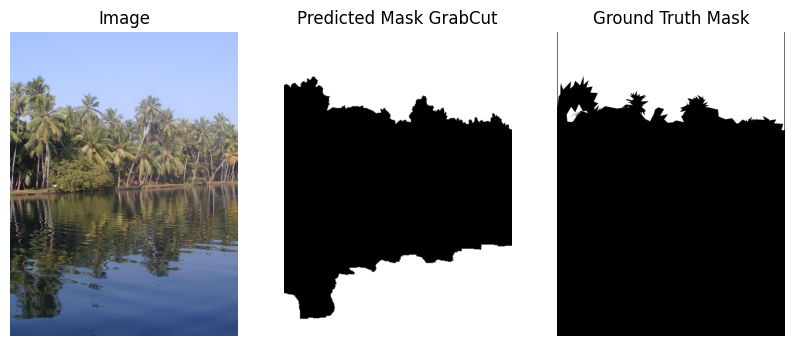

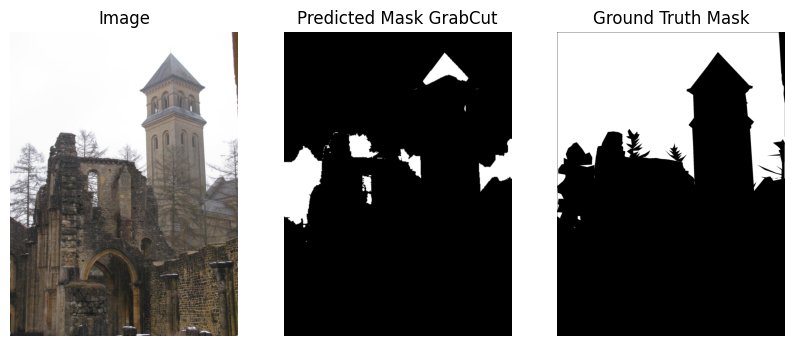

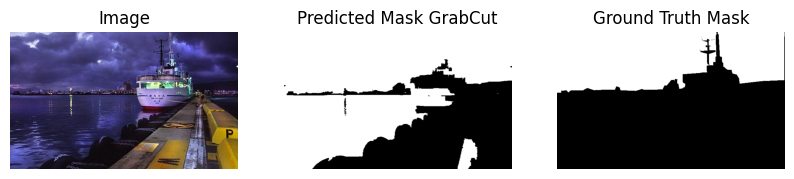

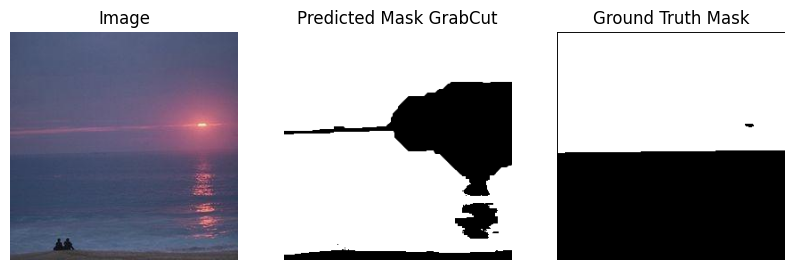

In [6]:

grab_cut_iou_score = []
grab_cut_dice_score = []
for idx in range(len(list_image_path)):
    # Deeplab segmentation
    image_path = list_image_path[idx]
    gt_mask_path = list_gt_mask_path[idx]
    image = Image.open(image_path)
    mask = sky_segmentation_grabcut.predict(image_path)
    gt = Image.open(gt_mask_path)
    display_segmentation_results(image, mask, gt, suffix_segm="GrabCut")
    # Convert the ground truth to binary format
    true_pred = np.array(gt) == 255
    pred = (mask == 255)
    grab_cut_iou_score.append(iou(pred, true_pred))
    grab_cut_dice_score.append(dice(pred, true_pred))


### Plot IOU and dice scores for Deeplab and GrabCut 

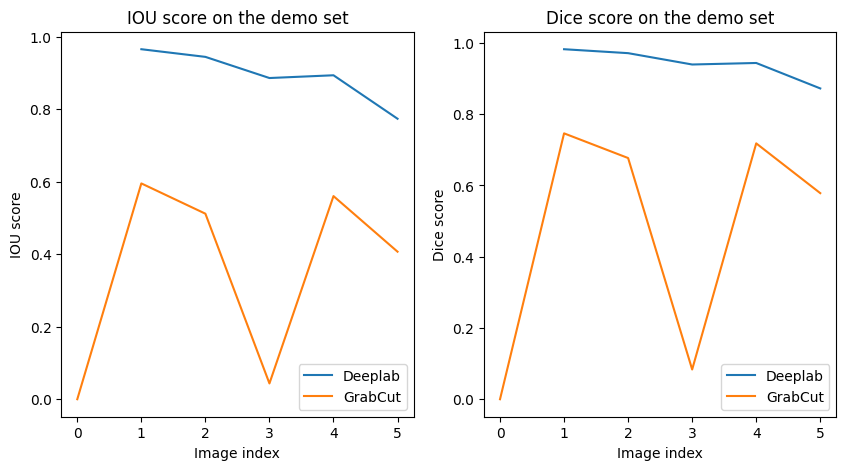

In [7]:

# Create a figure to plot metrics
_, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Plot IOU scores for Deeplab and GrabCut
axs[0].plot(np.arange(len(deeplab_iou_score)), deeplab_iou_score, label="Deeplab")
axs[0].plot(np.arange(len(grab_cut_iou_score)), grab_cut_iou_score, label="GrabCut")
axs[0].set_title("IOU score on the demo set")
axs[0].set_xlabel("Image index")
axs[0].set_ylabel("IOU score")
axs[0].legend()

# Plot Dice scores for Deeplab and GrabCut
axs[1].plot(np.arange(len(deeplab_iou_score)), deeplab_dice_score, label='Deeplab')
axs[1].plot(np.arange(len(grab_cut_dice_score)), grab_cut_dice_score, label='GrabCut')

# Customize the second subplot
axs[1].set_title("Dice score on the demo set")
axs[1].set_xlabel("Image index")
axs[1].set_ylabel("Dice score")
axs[1].legend()